![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [3]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [4]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [5]:
bikes.groupby('season').total.describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,116.343261,125.273974,1.0,24.0,78.0,164.0,801.0
2,2733.0,215.251372,192.007843,1.0,49.0,172.0,321.0,873.0
3,2733.0,234.417124,197.151001,1.0,68.0,195.0,347.0,977.0
4,2734.0,198.988296,177.622409,1.0,51.0,161.0,294.0,948.0


Para la variable "season" podemos observar que:
*   En promedio se alquilan más bicicletas en verano (3)
*   Invierno (1) es la temporada en la cual se alquilan menos bicicletas en promedio
* El mayor número de bicicletas alquiladas  fue de 977 en un día de verano
* El menor número de bicicletas alquiladas  fue de 1 y se presentó en días de las 4 temporadas
* Los datos están balanceados entre las 4 temporadas










In [6]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [7]:
bikes.groupby('hour').total.describe()

,count,mean,std,min,25%,50%,75%,max
hour,,,,,,,,
0,455.0,55.138462,43.620012,2.0,24.00,41.0,74.50,283.0
1,454.0,33.859031,34.112105,1.0,11.00,19.0,46.00,168.0
2,448.0,22.899554,26.110267,1.0,5.00,11.0,32.00,119.0
3,433.0,11.757506,12.666442,1.0,3.00,6.0,15.00,66.0
4,442.0,6.407240,4.217633,1.0,3.00,6.0,9.00,28.0
5,452.0,19.767699,12.784293,1.0,8.00,19.0,29.00,57.0
6,455.0,76.259341,54.745333,1.0,24.50,75.0,118.00,213.0
7,455.0,213.116484,159.207044,1.0,63.00,208.0,334.00,596.0
8,455.0,362.769231,231.723065,8.0,133.50,392.0,563.50,839.0


Para la variable "hour" podemos observar que:
*   En promedio se alquilan más bicicletas a las 5pm (17)
*   las 4am (4) es la hora en la cual se alquilan menos bicicletas en promedio
* El mayor número de bicicletas alquiladas  fue de 977 y se dio a las 5 y 6 pm (17 y 18)
* El menor número de bicicletas alquiladas  fue de 1 y s se dio de 1 a 7 am (1 a 7)
* Los datos están balanceados entre las 24 horas del día


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

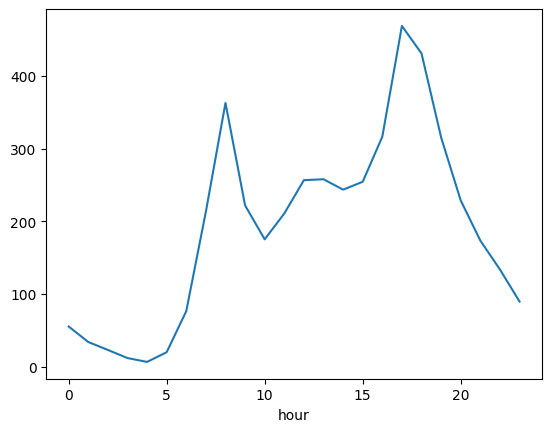

In [8]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

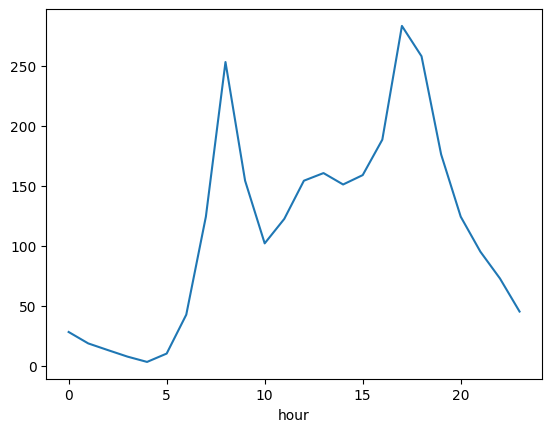

In [9]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes.groupby('season').get_group(1).groupby('hour').total.mean().plot()

Para la variable "hour" en la temporada de invierno podemos observar que la curva de distribución mantiene su forma vs el total de los datos (todas las temporadas), donde:
* En promedio se alquilan más bicicletas a las 5pm (17)
* Las 4am (4) es la hora en la cual se alquilan menos bicicletas en promedio
* Hay un segundo pico de un alto alquiler de bicicletas a las 8am (8) (máximo local)
* Hay un segundo pico de un bajo alquiler de bicicletas a las 10am (10) (mínimo local)

<Axes: xlabel='hour'>

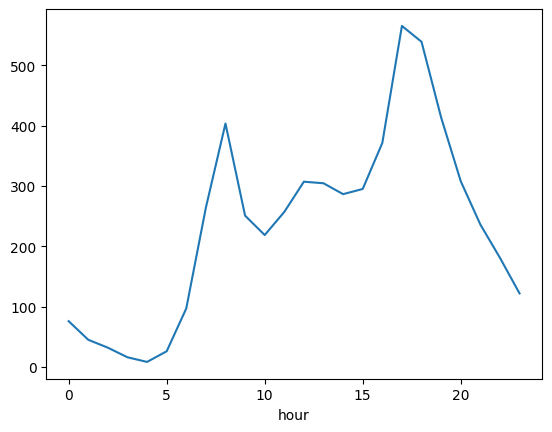

In [10]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes.groupby('season').get_group(3).groupby('hour').total.mean().plot()

Para la variable "hour" en la temporada de verano podemos observar que la curva de distribución mantiene su forma vs el total de los datos (todas las temporadas), donde:
* En promedio se alquilan más bicicletas a las 5pm (17)
* Las 4am (4) es la hora en la cual se alquilan menos bicicletas en promedio
* Hay un segundo pico de un alto alquiler de bicicletas a las 8am (8) (máximo local)
* Hay un segundo pico de un bajo alquiler de bicicletas a las 10am (10) (mínimo local)

Comparando las temporadas de invierno y verano, observamos que tienen una misma "forma" en su distribución (mínimos y máximos locales) pero con valores más bajos para invierno

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

el MSE es de:  160.13875579927014
Index(['hour', 'season_1', 'season_2', 'season_3', 'season_4'], dtype='object')
[ 10.62873885 -76.79345561  24.11431232  42.2252086   10.45393469]


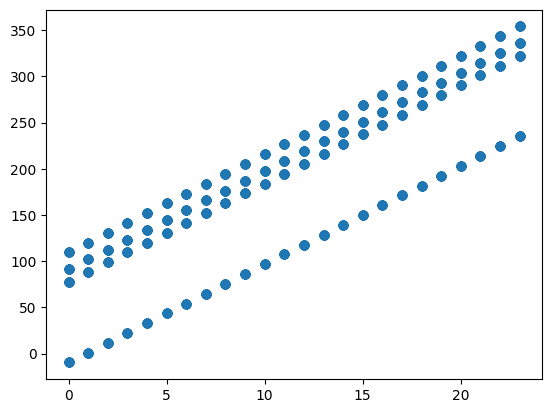

In [11]:
# Celda 3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#generar Y
yTotal=bikes['total']
#generar X
xTotal=bikes.get(['season','hour'])

#convertir season a categorica y luego a dummies
xTotal['season']=xTotal['season'].astype('object')
xTotal_t = pd.get_dummies(xTotal)

#separar en train and test
XTrain, XTest, yTrain, yTest = train_test_split(xTotal_t, yTotal, test_size=0.33, random_state=0)

# modelo de regresion lineal
lr = LinearRegression()
lr.fit(XTrain,yTrain)

#predicciones
y_pred = lr.predict(XTest)

#evaluar
MSE = np.sqrt(mean_squared_error(y_pred, yTest))
print('el MSE es de: ',MSE)

print(XTrain.columns)
print(lr.coef_)

plt.scatter(XTest['hour'],y_pred)

Analizando los coeficientes observamos que:
* La variable hora tiene un "impacto" positivo, dado su coeficiente positivo, lo que implica que entre más grande (más tarde) se alquilaran más bicicletas
* La temporada invierno tiene un "impacto" negativo en el total de bicicletas alquiladas dado su coeficiente negativo, es decir, se alquilarán menos bicicletas en invierno
* Las demás temporadas tienen un "impacto" positivo, dado sus coeficientes positivos, donde verano tiene más "peso", seguido de primavera y por último otoño


Adicionalmente, se observa que al usar un modelo de regresión lineal, no se pueden predecir los máximos y mínimos locales, dada su poca flexibilidad, como sucede con el caso de la variable hora, en la cual se observó en análisis previos, que cuenta con varios mínimos y máximos locales. (genera Sesgo)

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [12]:
# Celda 4

# paremetros
max_depth = 6
num_pct = 10
max_features = None


# Definición de la función que calcula el MSE
def MSE(X_col, y, split):
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    y_pred_l = y_l.mean()
    y_pred_r = y_r.mean()
    
    y_sum_l_2 = (y_l-y_pred_l)**2
    y_sum_r_2 = (y_r-y_pred_r)**2

    MSE_l= (y_sum_l_2.sum())/n_l
    MSE_r= (y_sum_r_2.sum())/n_r
    
    MSE = ((n_l/(n_l+n_r))*MSE_l) + ((n_r/(n_l+n_r))*MSE_r)
    return MSE

# Definición de la función best_split para calcular cuál es la mejor variable y punto de corte para hacer la bifurcación del árbol segun MSE
def best_split(X,y, num_pct=10):
    
    features = range(X.shape[1])
    best_split = [0, 0, 0]  # j, split, MSE
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            MSEs = MSE(X.iloc[:, j], y, split)
                        
            if MSEs > best_split[2]:
                best_split = [j, split, MSEs]
    
    return best_split

# Definición de la función tree_grow para hacer un crecimiento recursivo del árbol
def tree_grow(X, y, level=0, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, MSE=0)
        return tree
    
    # Calcular la mejor división
    j, split, MSE = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = y.mean() 
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace 
    
    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], MSE=MSE)
    # Revisar el criterio de parada 
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, max_depth=max_depth, num_pct=num_pct)
    
    return tree
  
# Aplicación de la función tree_grow
tree_grow(XTrain,yTrain, level=0, max_depth=6, num_pct=10)


IndexError: ignored

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [16]:
# Celda 5
# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
NMSE_scores = []
R2_scores = []
# Importación de modelos de sklearn 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    NMSE_scores.append(cross_val_score(clf, xTotal_t, yTotal, cv=10, scoring='neg_mean_squared_error').mean())
    R2_scores.append(cross_val_score(clf, xTotal_t, yTotal, cv=10, scoring='r2').mean())

Text(0, 0.5, 'MSE')

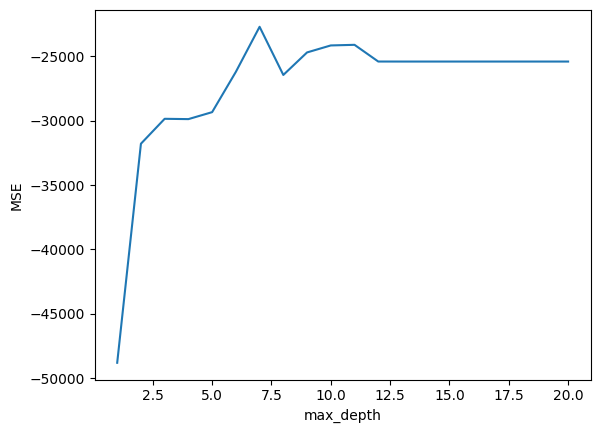

In [17]:

# Gráfica max_depth versus NMSE
plt.plot(max_depth_range, NMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('MSE')

Text(0, 0.5, 'R2')

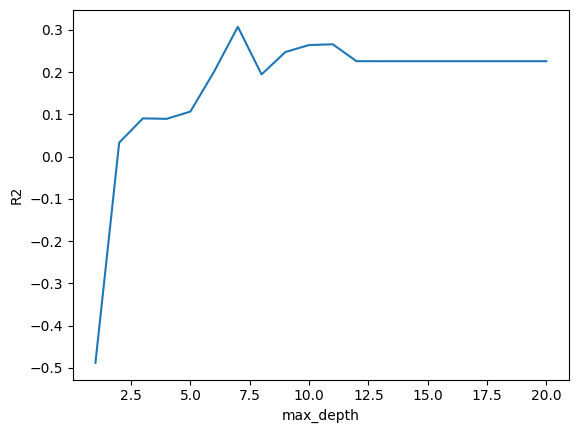

In [18]:

# Gráfica max_depth versus R2
plt.plot(max_depth_range, R2_scores)
plt.xlabel('max_depth')
plt.ylabel('R2')

In [20]:
# Mejor NMSE (desempeño del modelo) y su correspondiente max_depth
sorted(zip(NMSE_scores, max_depth_range))[::-1][0]

(-22692.279943654456, 7)

In [21]:
# Mejor R2 (desempeño del modelo) y su correspondiente max_depth
sorted(zip(R2_scores, max_depth_range))[::-1][0]

(0.30697548752463766, 7)

In [22]:
# max_depth=4 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=7, random_state=1)
clf.fit(XTrain, yTrain)


DecisionTreeClassifier(max_depth=7, random_state=1)

In [24]:
#prediccion en test

pred = clf.predict(XTest)
MSEt = mean_squared_error (yTest,pred)
print('el MSE es de: ',MSEt)

el MSE es de:  22616.019204007793


## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [25]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [26]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [27]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [28]:
# Celda 6
#arbol
#calibracion

# Lista de valores para calibrar el criterio de parada de máxima profundidad (max_depth)
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []
f1_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X, y, cv=10, scoring='accuracy').mean())
    f1_scores.append(cross_val_score(clf, X, y, cv=10, scoring='f1').mean())

(0.6353333333333333, 2)

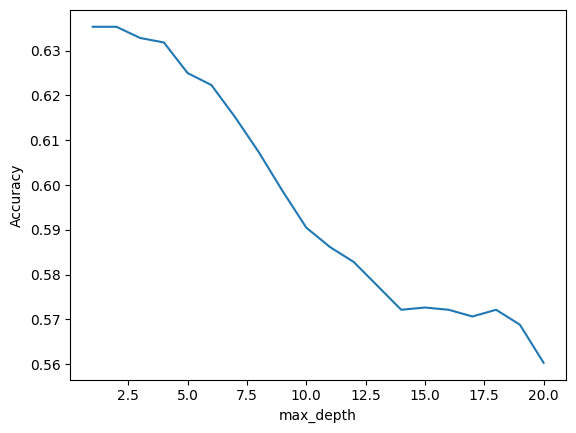

In [29]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

# Mejor accuracy (desempeño del modelo) y su correspondiente max_depth
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6322597160569876, 2)

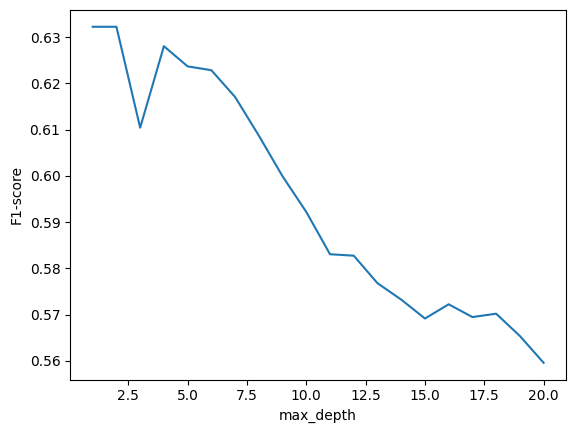

In [30]:
# Gráfica max_depth versus RMSE (error del modelo)
plt.plot(max_depth_range, f1_scores)
plt.xlabel('max_depth')
plt.ylabel('F1-score')

# Mejor F1-Score (desempeño del modelo) y su correspondiente max_depth
sorted(zip(f1_scores, max_depth_range))[::-1][0]

In [31]:
# max_depth=2 fue el mejor, se ajusta un árbol usando este valor 
clf = DecisionTreeClassifier(max_depth=2, random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=1)

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
#prediccion
pred_tree = clf.predict(X_test)
#evaluacion con 
accuracy_tree = accuracy_score(y_test,pred_tree)
f1_tree = f1_score(y_test,pred_tree)
print("el accuracy del arbol es: ",accuracy_tree," y el F1-score es de: ", f1_tree)

el accuracy del arbol es:  0.6453333333333333  y el F1-score es de:  0.6448598130841121


In [33]:
#Regresion Logistica
from sklearn.linear_model import LogisticRegression
#prediccion
clfRegLog= LogisticRegression(random_state=0,max_iter=10000)
clfRegLog.fit(X_train,y_train)
pred_RegLog=clfRegLog.predict(X_test)

#evaluacion con 
accuracy_RegLog = accuracy_score(y_test,pred_RegLog)
f1_RegLog = f1_score(y_test,pred_RegLog)
print("el accuracy de la RL es: ",accuracy_RegLog," y el F1-score es de: ", f1_RegLog)


el accuracy de la RL es:  0.6253333333333333  y el F1-score es de:  0.6129476584022039


Se observa que ambos modelos tiene un desempeño similar, siendo el Árbol de decisión un poco mejor al obtener un accuracy y un F1-score un poco más elevado

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [34]:
# Celda 7
from sklearn.ensemble import BaggingClassifier
#100 arboles max_depth
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=10), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
# Predicción
clf.fit(X_train, y_train)
y_pred_depth = clf.predict(X_test)


In [35]:
#desempeño al hacer votación mayoritaria
accuracy_100tree_depth = accuracy_score(y_test,y_pred_depth)
f1_100tree_depth = f1_score(y_test,y_pred_depth)
print("el accuracy del ensamblaje ""100tree depth"" es: ",accuracy_100tree_depth," y el F1-score es de: ", f1_100tree_depth)

el accuracy del ensamblaje 100tree depth es:  0.6533333333333333  y el F1-score es de:  0.6574440052700922


Se observa que el desempeño del ensamblaje mejoro (mejor acuraccy y F1) dado que se pudo aumentar la profundidad del árbol para reducir su sesgo sin introducir mucha varianza.

In [36]:
#100 arboles min_samples_leaf
clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(min_samples_leaf=10), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
# Predicción
clf.fit(X_train, y_train)
y_pred_leaf = clf.predict(X_test)

In [37]:
#desempeño al hacer votación mayoritaria
accuracy_100tree_leaf = accuracy_score(y_test,y_pred_leaf)
f1_100tree_leaf = f1_score(y_test,y_pred_leaf)
print("el accuracy del ensamblaje ""100tree min leaf"" es: ",accuracy_100tree_leaf," y el F1-score es de: ", f1_100tree_leaf)

el accuracy del ensamblaje 100tree min leaf es:  0.656  y el F1-score es de:  0.6596306068601584


Se observa que el desempeño del ensamblaje mejoro (mejor acuraccy y F1)

In [38]:
#100 RL
clf = BaggingClassifier(base_estimator=LogisticRegression(random_state=0,max_iter=10000), n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
# Predicción
clf.fit(X_train, y_train)
y_pred_RL = clf.predict(X_test)

In [39]:
#desempeño al hacer votación mayoritaria
accuracy_100RL = accuracy_score(y_test,y_pred_RL)
f1_100RL = f1_score(y_test,y_pred_RL)
print("el accuracy del ensamblaje 100RL es: ",accuracy_100RL," y el F1-score es de: ", f1_100RL)

el accuracy del ensamblaje 100RL es:  0.6213333333333333  y el F1-score es de:  0.6088154269972452


No se observa una mejora en este ensamblaje vs el modelo sin ensamblaje, esto puede deberse a que el método Bagging mejora la varianza de la variancia, por lo que tiene un mejor efecto en árboles que en Regresión logística

In [40]:
#ensamblaje 300
y_mix =((y_pred_depth + y_pred_leaf + y_pred_RL) >= (3/2)).astype(np.int)
#desempeño al hacer votación mayoritaria
accuracy_mix = accuracy_score(y_test,y_mix)
f1_mix = f1_score(y_test,y_mix)
print("el accuracy del ensamblaje de 300 es: ",accuracy_mix," y el F1-score es de: ", f1_mix)

el accuracy del ensamblaje de 300 es:  0.6513333333333333  y el F1-score es de:  0.6538716082064858


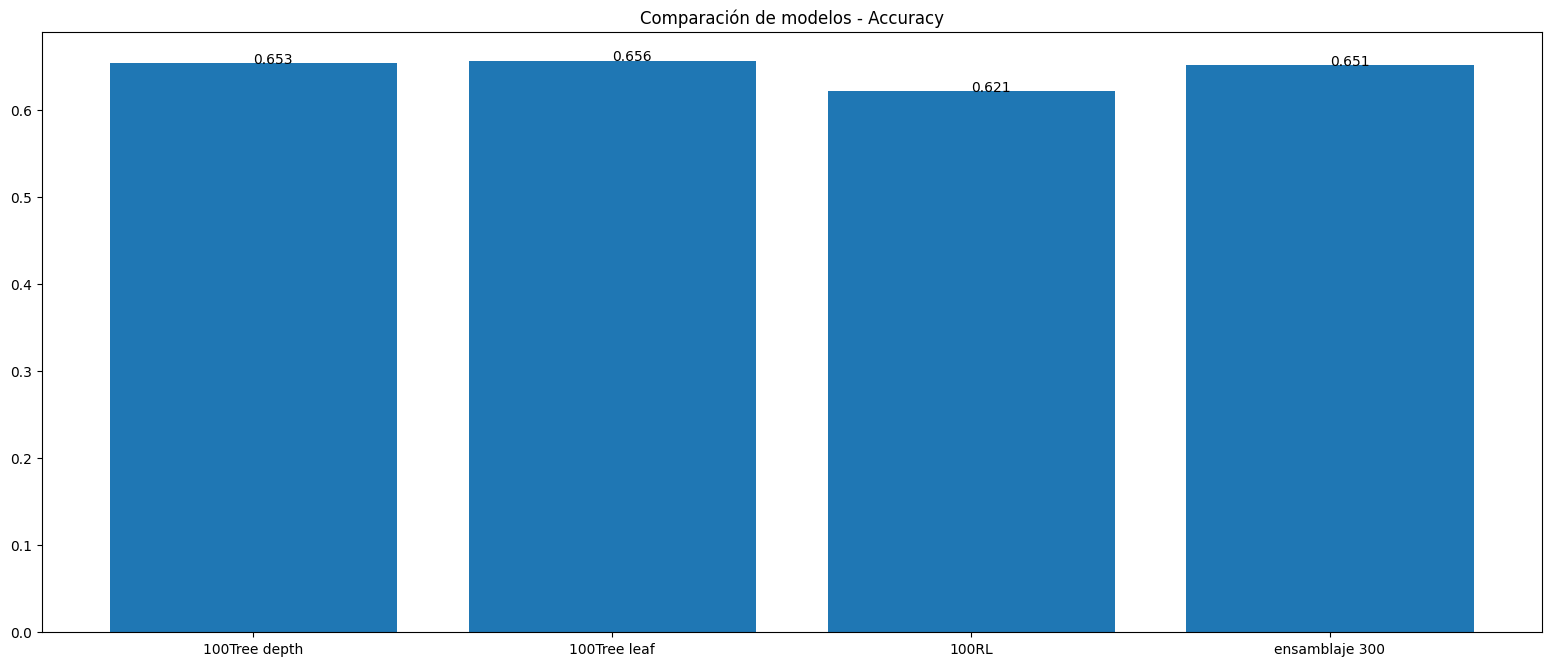

In [41]:
fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos - Accuracy")
ejeX = ['100Tree depth','100Tree leaf','100RL','ensamblaje 300']
ejeY = [accuracy_100tree_depth,accuracy_100tree_leaf,accuracy_100RL,accuracy_mix]
ejeY = [round(v,3) for v in ejeY]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

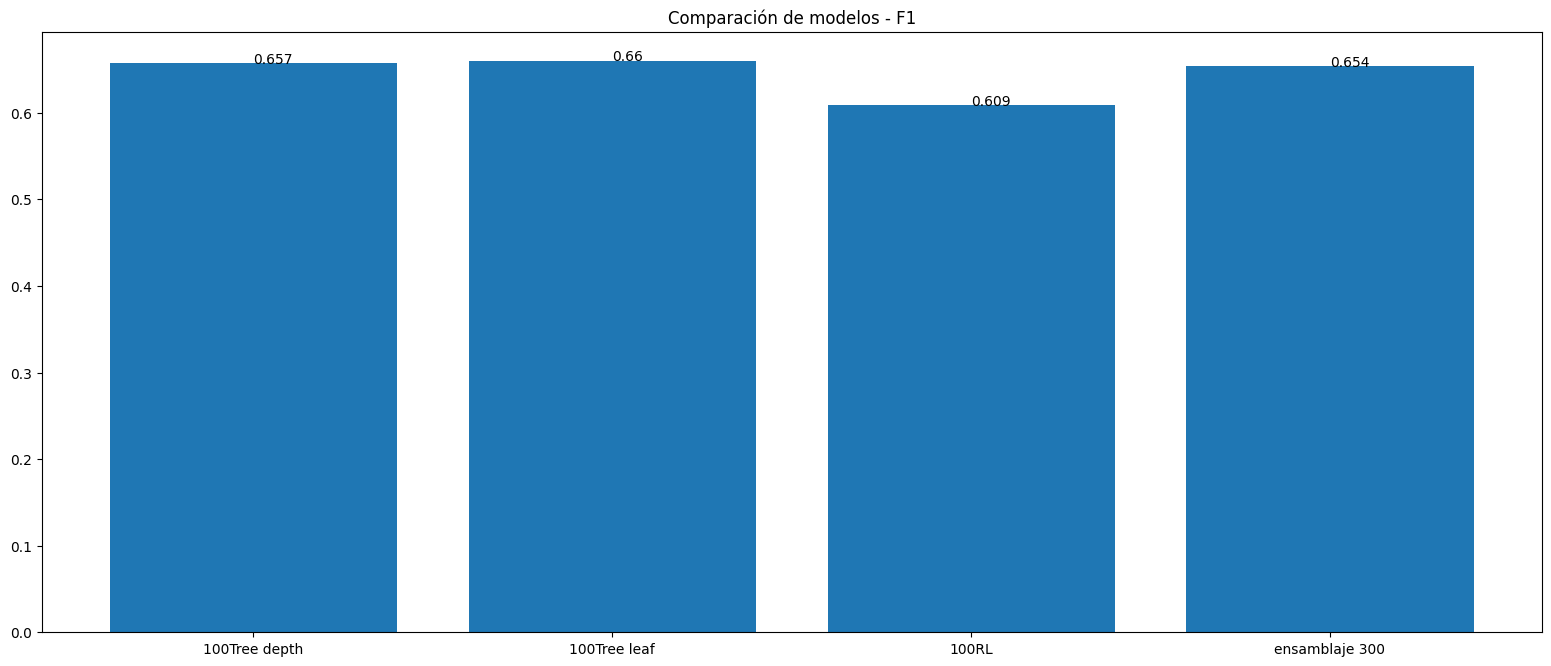

In [42]:
fig = plt.figure(figsize=[15,6])
ax = fig.add_axes([0,0,1,1])
ax.set_title("Comparación de modelos - F1")
ejeX = ['100Tree depth','100Tree leaf','100RL','ensamblaje 300']
ejeY = [f1_100tree_depth,f1_100tree_leaf,f1_100RL,f1_mix]
ejeY = [round(v,3) for v in ejeY]
ax.bar(ejeX,ejeY)
def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i,y[i],y[i])
addlabels(ejeX,ejeY,plt)
plt.show()

Se observa que los modelos tiene métricas similares, principalmente los modelos de ensamblajes de árboles y el combinado (incluye árboles); donde el que obtuvo mejor accuracy y F1 fue el ensamblaje de 100 árboles con el parámetro de mínima cantidad de observaciones en una hoja fijado en 10

### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [43]:
# Celda 8


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

In [44]:
# Celda 9